# PROJECT 3 wine data cleaning

- using pandas to drop unnecessary columns from the original dataset from :
  
--- https://www.kaggle.com/datasets/zynicide/wine-reviews?resource=download

In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import datetime as dt
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import json
import re
import nltk

In [3]:
# reading data into a dataframe
wine_data = pd.read_csv(r"C:\Users\15126\Downloads\archive\winemag-data_first150k.csv")
wine_data

Unnamed: 0 country                                        description  \
0                0      US  This tremendous 100% varietal wine hails from ...   
1                1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2                2      US  Mac Watson honors the memory of a wine once ma...   
3                3      US  This spent 20 months in 30% new French oak, an...   
4                4  France  This is the top wine from La Bégude, named aft...   
...            ...     ...                                                ...   
150925      150925   Italy  Many people feel Fiano represents southern Ita...   
150926      150926  France  Offers an intriguing nose with ginger, lime an...   
150927      150927   Italy  This classic example comes from a cru vineyard...   
150928      150928  France  A perfect salmon shade, with scents of peaches...   
150929      150929   Italy  More Pinot Grigios should taste like this. A r...   

                                 designation  points  price  \
0                          Martha's Vineyard      96  235.0   
1       Carodorum Selección Especial Reserva      96  110.0   
2              Special Selected Late Harvest      96   90.0   
3                                    Reserve      96   65.0   
4                                 La Brûlade      95   66.0   
...                                      ...     ...    ...   
150925                                   NaN      91   20.0   
150926                        Cuvée Prestige      91   27.0   
150927                         Terre di Dora      91   20.0   
150928                       Grand Brut Rosé      90   52.0   
150929                                   NaN      90   15.0   

                  province           region_1           region_2  \
0               California        Napa Valley               Napa   
1           Northern Spain               Toro                NaN   
2               California     Knights Valley             Sonoma   
3                   Oregon  Willamette Valley  Willamette Valley   
4                 Provence             Bandol                NaN   
...                    ...                ...                ...   
150925      Southern Italy  Fiano di Avellino                NaN   
150926           Champagne          Champagne                NaN   
150927      Southern Italy  Fiano di Avellino                NaN   
150928           Champagne          Champagne                NaN   
150929  Northeastern Italy         Alto Adige                NaN   

                   variety                   winery  
0       Cabernet Sauvignon                    Heitz  
1            Tinta de Toro  Bodega Carmen Rodríguez  
2          Sauvignon Blanc                 Macauley  
3               Pinot Noir                    Ponzi  
4       Provence red blend     Domaine de la Bégude  
...                    ...                      ...  
150925         White Blend    Feudi di San Gregorio  
150926     Champagne Blend                H.Germain  
150927         White Blend                Terredora  
150928     Champagne Blend                   Gosset  
150929        Pinot Grigio            Alois Lageder  

[150930 rows x 11 columns]

In [4]:
# dropping columns with high n/a values
wine_drop = wine_data.drop(['designation', 'region_1','region_2','Unnamed: 0'], axis=1)
wine_drop

country                                        description  points  \
0           US  This tremendous 100% varietal wine hails from ...      96   
1        Spain  Ripe aromas of fig, blackberry and cassis are ...      96   
2           US  Mac Watson honors the memory of a wine once ma...      96   
3           US  This spent 20 months in 30% new French oak, an...      96   
4       France  This is the top wine from La Bégude, named aft...      95   
...        ...                                                ...     ...   
150925   Italy  Many people feel Fiano represents southern Ita...      91   
150926  France  Offers an intriguing nose with ginger, lime an...      91   
150927   Italy  This classic example comes from a cru vineyard...      91   
150928  France  A perfect salmon shade, with scents of peaches...      90   
150929   Italy  More Pinot Grigios should taste like this. A r...      90   

        price            province             variety                   winery  
0       235.0          California  Cabernet Sauvignon                    Heitz  
1       110.0      Northern Spain       Tinta de Toro  Bodega Carmen Rodríguez  
2        90.0          California     Sauvignon Blanc                 Macauley  
3        65.0              Oregon          Pinot Noir                    Ponzi  
4        66.0            Provence  Provence red blend     Domaine de la Bégude  
...       ...                 ...                 ...                      ...  
150925   20.0      Southern Italy         White Blend    Feudi di San Gregorio  
150926   27.0           Champagne     Champagne Blend                H.Germain  
150927   20.0      Southern Italy         White Blend                Terredora  
150928   52.0           Champagne     Champagne Blend                   Gosset  
150929   15.0  Northeastern Italy        Pinot Grigio            Alois Lageder  

[150930 rows x 7 columns]

In [5]:
#dropping rows where there is missing data
wine_clean = wine_drop.dropna()
wine_clean

country                                        description  points  \
0           US  This tremendous 100% varietal wine hails from ...      96   
1        Spain  Ripe aromas of fig, blackberry and cassis are ...      96   
2           US  Mac Watson honors the memory of a wine once ma...      96   
3           US  This spent 20 months in 30% new French oak, an...      96   
4       France  This is the top wine from La Bégude, named aft...      95   
...        ...                                                ...     ...   
150925   Italy  Many people feel Fiano represents southern Ita...      91   
150926  France  Offers an intriguing nose with ginger, lime an...      91   
150927   Italy  This classic example comes from a cru vineyard...      91   
150928  France  A perfect salmon shade, with scents of peaches...      90   
150929   Italy  More Pinot Grigios should taste like this. A r...      90   

        price            province             variety                   winery  
0       235.0          California  Cabernet Sauvignon                    Heitz  
1       110.0      Northern Spain       Tinta de Toro  Bodega Carmen Rodríguez  
2        90.0          California     Sauvignon Blanc                 Macauley  
3        65.0              Oregon          Pinot Noir                    Ponzi  
4        66.0            Provence  Provence red blend     Domaine de la Bégude  
...       ...                 ...                 ...                      ...  
150925   20.0      Southern Italy         White Blend    Feudi di San Gregorio  
150926   27.0           Champagne     Champagne Blend                H.Germain  
150927   20.0      Southern Italy         White Blend                Terredora  
150928   52.0           Champagne     Champagne Blend                   Gosset  
150929   15.0  Northeastern Italy        Pinot Grigio            Alois Lageder  

[137230 rows x 7 columns]

In [6]:
wine_unique = wine_clean.drop_duplicates()
wine_unique

country                                        description  points  \
0              US  This tremendous 100% varietal wine hails from ...      96   
1           Spain  Ripe aromas of fig, blackberry and cassis are ...      96   
2              US  Mac Watson honors the memory of a wine once ma...      96   
3              US  This spent 20 months in 30% new French oak, an...      96   
4          France  This is the top wine from La Bégude, named aft...      95   
...           ...                                                ...     ...   
149634     France  Atypically light in body and reticent on the n...      84   
149635         US  A Syrah-Grenache blend that's dry and rustical...      84   
149637         US  Outside of the vineyard, wines like this are w...      84   
149638  Argentina  Heavy and basic, with melon and pineapple arom...      84   
149639  Australia  Smooth in the mouth, this Chard starts off wit...      84   

        price          province             variety                   winery  
0       235.0        California  Cabernet Sauvignon                    Heitz  
1       110.0    Northern Spain       Tinta de Toro  Bodega Carmen Rodríguez  
2        90.0        California     Sauvignon Blanc                 Macauley  
3        65.0            Oregon          Pinot Noir                    Ponzi  
4        66.0          Provence  Provence red blend     Domaine de la Bégude  
...       ...               ...                 ...                      ...  
149634   15.0            Alsace      Gewürztraminer          W. Gisselbrecht  
149635   15.0        California      Syrah-Grenache            Casa Barranca  
149637    6.0        California              Merlot                 Delicato  
149638    9.0  Mendoza Province     Sauvignon Blanc        Finca El Portillo  
149639    8.0   Australia Other          Chardonnay            Jacob's Creek  

[89125 rows x 7 columns]

In [84]:
wine_unique.to_csv("wine_clean.csv", index=False)

Import the data first:

---shell
mongoimport --type csv -d project_3 -c wine --headerline --drop wine_clean.csv //do this to import to mongo
```

In [85]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [86]:
print(mongo.list_database_names())

['Garden_DB', 'admin', 'classDB', 'config', 'epa', 'local', 'met', 'petsitly_marketing', 'project_3', 'test']


# Determining the connection with the most used and least used descriptive words with the review score

-using nltk library to find individual words and mongo/pandas aggregation to see this data on each extremity

select each collections 'description' column and parse using regex to get only the words and put each into a object like a dictionary and then use MAX to find the most used descriptive words and MIN to find the least used descriptive words 

In [87]:
wine_unique['description'][0]

'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'

In [88]:
#use word_tokenize to parse through the description and get individual words
tokens = nltk.word_tokenize(wine_unique['description'][0])
tokens

['This',
 'tremendous',
 '100',
 '%',
 'varietal',
 'wine',
 'hails',
 'from',
 'Oakville',
 'and',
 'was',
 'aged',
 'over',
 'three',
 'years',
 'in',
 'oak',
 '.',
 'Juicy',
 'red-cherry',
 'fruit',
 'and',
 'a',
 'compelling',
 'hint',
 'of',
 'caramel',
 'greet',
 'the',
 'palate',
 ',',
 'framed',
 'by',
 'elegant',
 ',',
 'fine',
 'tannins',
 'and',
 'a',
 'subtle',
 'minty',
 'tone',
 'in',
 'the',
 'background',
 '.',
 'Balanced',
 'and',
 'rewarding',
 'from',
 'start',
 'to',
 'finish',
 ',',
 'it',
 'has',
 'years',
 'ahead',
 'of',
 'it',
 'to',
 'develop',
 'further',
 'nuance',
 '.',
 'Enjoy',
 '2022–2030',
 '.']

In [89]:
#use pos_tag to give each individual element a part-of-speech
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('tremendous', 'JJ'),
 ('100', 'CD'),
 ('%', 'NN'),
 ('varietal', 'JJ'),
 ('wine', 'NN'),
 ('hails', 'NNS'),
 ('from', 'IN'),
 ('Oakville', 'NNP'),
 ('and', 'CC'),
 ('was', 'VBD'),
 ('aged', 'VBN'),
 ('over', 'IN'),
 ('three', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('oak', 'NN'),
 ('.', '.'),
 ('Juicy', 'NNP'),
 ('red-cherry', 'JJ'),
 ('fruit', 'NN'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('compelling', 'JJ'),
 ('hint', 'NN'),
 ('of', 'IN'),
 ('caramel', 'JJ'),
 ('greet', 'NN'),
 ('the', 'DT'),
 ('palate', 'NN'),
 (',', ','),
 ('framed', 'VBN'),
 ('by', 'IN'),
 ('elegant', 'JJ'),
 (',', ','),
 ('fine', 'JJ'),
 ('tannins', 'NNS'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('subtle', 'JJ'),
 ('minty', 'NN'),
 ('tone', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('background', 'NN'),
 ('.', '.'),
 ('Balanced', 'NNP'),
 ('and', 'CC'),
 ('rewarding', 'VBG'),
 ('from', 'IN'),
 ('start', 'NN'),
 ('to', 'TO'),
 ('finish', 'VB'),
 (',', ','),
 ('it', 'PRP'),
 ('has', 'VBZ'),
 ('years', 'NNS'),
 (

In [90]:
#looking for JJ adjective ‘big’,JJR adjective, comparative ‘bigger’,JJS adjective, superlative ‘biggest’,
#RB adverb very, silently,RBR adverb, comparative better,RBS adverb, superlative best
#COUNTING THEM AS A INDIVIDUALs FOR EACH ROW AND THEN adding the series to the dataframe

temp = []
fairywords = []
count = 0
stop = 1
tagged = []
total = []

for bag in wine_unique.iterrows():

    tokens = nltk.word_tokenize(bag[1][1])#the square list of bag gets the current description
    tagged = nltk.pos_tag(tokens)
    stop = 0
    count = 0

    for row in tagged:
            stop+=1

            if row[1] == 'JJ':
                temp.append(row[0])
                count+=1
            elif row[1] == 'JJR':
                temp.append(row[0])
                count+=1
            elif row[1] == 'JJS':
                temp.append(row[0])
                count+=1
            elif row[1] == 'RB':
                temp.append(row[0])
                count+=1
            elif row[1] == 'RBR':
                temp.append(row[0])
                count+=1
            elif row[1] == 'RBS':
                temp.append(row[0])
                count+=1

            if stop == len(tagged):
                fairywords.append(count)
                total.append(len(tagged))
            

print(fairywords)
print(total)
print(temp)
          
            

[10, 7, 8, 8, 6, 10, 10, 14, 11, 9, 14, 12, 5, 11, 9, 9, 5, 7, 10, 9, 5, 10, 12, 9, 8, 8, 11, 9, 6, 8, 9, 6, 6, 3, 6, 6, 8, 8, 5, 11, 8, 7, 9, 3, 4, 2, 4, 12, 8, 6, 14, 9, 10, 7, 6, 7, 4, 5, 5, 6, 6, 10, 10, 5, 8, 5, 6, 2, 5, 6, 8, 10, 9, 6, 6, 4, 6, 9, 6, 3, 8, 6, 11, 6, 7, 8, 8, 7, 5, 7, 8, 8, 9, 6, 3, 7, 6, 7, 13, 4, 9, 3, 7, 7, 5, 8, 5, 5, 7, 10, 8, 9, 8, 9, 8, 10, 11, 9, 7, 14, 13, 13, 6, 5, 6, 8, 9, 9, 15, 6, 3, 7, 10, 9, 10, 7, 14, 6, 7, 10, 5, 9, 5, 9, 14, 4, 6, 7, 7, 7, 8, 6, 11, 8, 7, 4, 13, 7, 4, 13, 8, 4, 4, 5, 10, 5, 10, 4, 7, 8, 15, 11, 7, 6, 7, 5, 7, 7, 5, 5, 5, 9, 11, 8, 11, 7, 6, 2, 3, 7, 11, 5, 5, 8, 9, 8, 8, 9, 9, 4, 8, 10, 4, 5, 6, 13, 8, 10, 16, 11, 8, 7, 10, 9, 16, 5, 9, 13, 5, 9, 7, 10, 11, 7, 10, 13, 4, 9, 5, 8, 10, 12, 14, 10, 7, 5, 6, 7, 6, 5, 10, 7, 5, 10, 5, 8, 10, 9, 10, 9, 6, 8, 6, 6, 13, 7, 7, 8, 9, 8, 11, 8, 9, 7, 13, 6, 5, 9, 9, 7, 11, 8, 10, 10, 10, 10, 6, 11, 11, 7, 11, 9, 10, 10, 9, 13, 7, 8, 5, 6, 5, 10, 10, 9, 9, 6, 12, 9, 9, 7, 14, 8, 7, 9, 9, 9, 

In [91]:
len(total)

89125

In [92]:
wine_unique['total words'] = total
wine_unique['descriptive words'] = fairywords

C:\Users\15126\AppData\Local\Temp\ipykernel_9588\3801351263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_unique['total words'] = total
C:\Users\15126\AppData\Local\Temp\ipykernel_9588\3801351263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_unique['descriptive words'] = fairywords


In [111]:
wine_unique.to_csv("wine_unique.csv", index=False)

In [94]:
from collections import Counter


In [95]:
Counter = Counter(temp)

In [96]:
occurences = Counter.most_common()
most_occur = Counter.most_common(10)
least_occur = Counter.most_common()[:-10-1:-1]       # n least common elements

In [97]:
print(most_occur)
print(least_occur)
print(len(occurences))


[('black', 14284), ('now', 11314), ('dry', 11288), ('rich', 11034), ('red', 10414), ('ripe', 9458), ('sweet', 9339), ('fresh', 9012), ('soft', 8800), ('good', 8717)]
[('tauter', 1), ('state-run', 1), ('unkind', 1), ('floral/minerally', 1), ('papery/wooly', 1), ('nice—clay', 1), ('cottony-soft', 1), ('family—the', 1), ('Pouilly-sur-Loire-based', 1), ('prune-based', 1)]
17147


In [98]:
print(max(wine_unique['total words']))
print(max(wine_unique['descriptive words']))

156
30


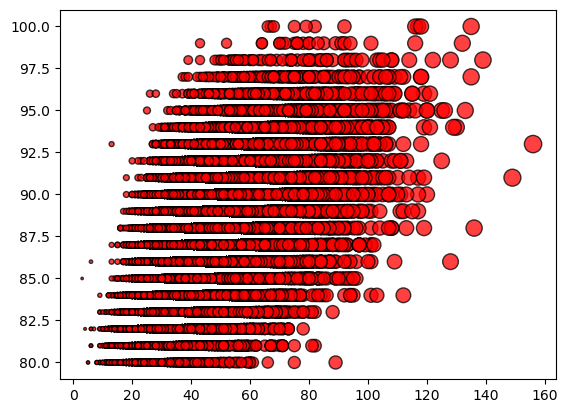

In [99]:
# the scatter plot (number of words against points)
plt.scatter(wine_unique['total words'], wine_unique['points'], marker="o", facecolors="red", edgecolors="black",
            s=wine_unique['total words'], alpha=0.75)
plt.show()

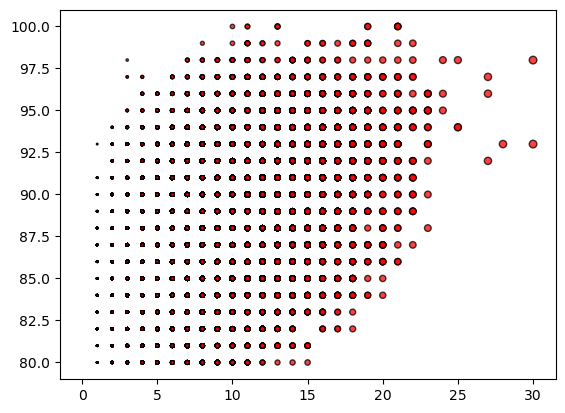

In [100]:
# the scatter plot (number of descriptive against points)
plt.scatter(wine_unique['descriptive words'], wine_unique['points'], marker="o", facecolors="red", edgecolors="black",
            s=wine_unique['descriptive words'], alpha=0.75)
plt.show()

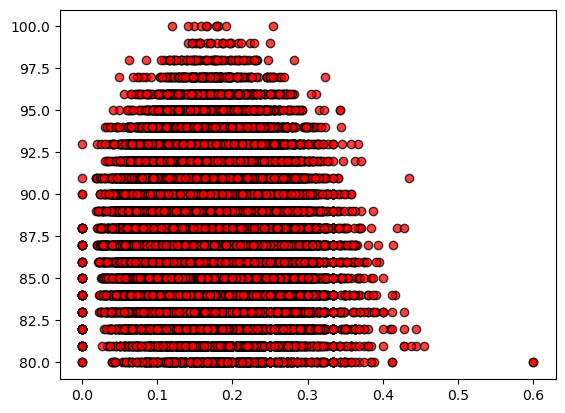

In [101]:
# the scatter plot (percentage of descriptive by total against points)
plt.scatter((wine_unique['descriptive words']/wine_unique['total words']), wine_unique['points']
            , marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.show()

In [102]:
#data for pie chart
data = []
labels = []
total = []

for items in most_occur:
    labels.append(items[0])
    data.append(items[1])

for items in least_occur:
    labels.append(items[0])
    data.append(items[1])

for items in occurences:
    total.append(items[1])

labels.append('other')
data.append(sum(total)-sum(data))

print(labels)
print(data)

['black', 'now', 'dry', 'rich', 'red', 'ripe', 'sweet', 'fresh', 'soft', 'good', 'tauter', 'state-run', 'unkind', 'floral/minerally', 'papery/wooly', 'nice—clay', 'cottony-soft', 'family—the', 'Pouilly-sur-Loire-based', 'prune-based', 'other']
[14284, 11314, 11288, 11034, 10414, 9458, 9339, 9012, 8800, 8717, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 608467]


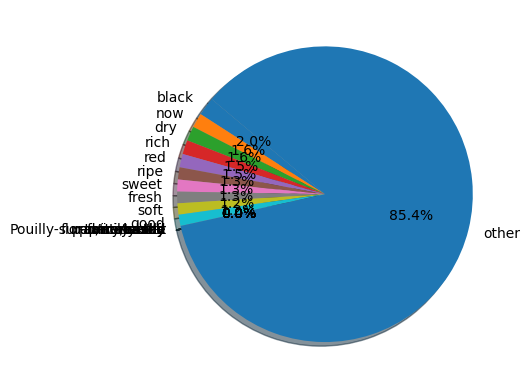

In [103]:
# The colors of each section of the pie chart
#colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(data,labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [11]:
countrypoints = wine_unique.groupby('country')['points'].mean()
countrypoints

Index(['Albania', 'Argentina', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Croatia', 'Cyprus', 'Czech Republic', 'England', 'France',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Israel', 'Italy',
       'Japan', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macedonia', 'Mexico',
       'Moldova', 'Montenegro', 'Morocco', 'New Zealand', 'Portugal',
       'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Switzerland', 'Turkey', 'US', 'US-France',
       'Ukraine', 'Uruguay'],
      dtype='object', name='country')

In [22]:
x=countrypoints.tolist()
x

[88.0,
 86.0827485380117,
 87.94383473208522,
 89.33750782717595,
 85.33333333333333,
 83.42857142857143,
 85.76785714285714,
 88.71621621621621,
 86.28189189189189,
 82.0,
 86.74626865671642,
 86.06666666666666,
 85.83333333333333,
 92.75,
 88.63181148748158,
 85.56666666666666,
 88.83130904183535,
 86.21308411214953,
 87.65217391304348,
 88.42857142857143,
 87.41525423728814,
 88.45076100370218,
 85.0,
 85.85185185185185,
 84.25,
 87.0,
 85.33333333333333,
 85.0925925925926,
 85.28260869565217,
 82.0,
 88.27272727272727,
 87.60137457044674,
 88.25669233590025,
 85.25471698113208,
 87.7,
 84.5,
 88.2,
 87.24043715846994,
 81.5,
 86.75232774674116,
 87.25,
 88.2,
 87.90624302956702,
 88.0,
 84.6,
 84.77551020408163]

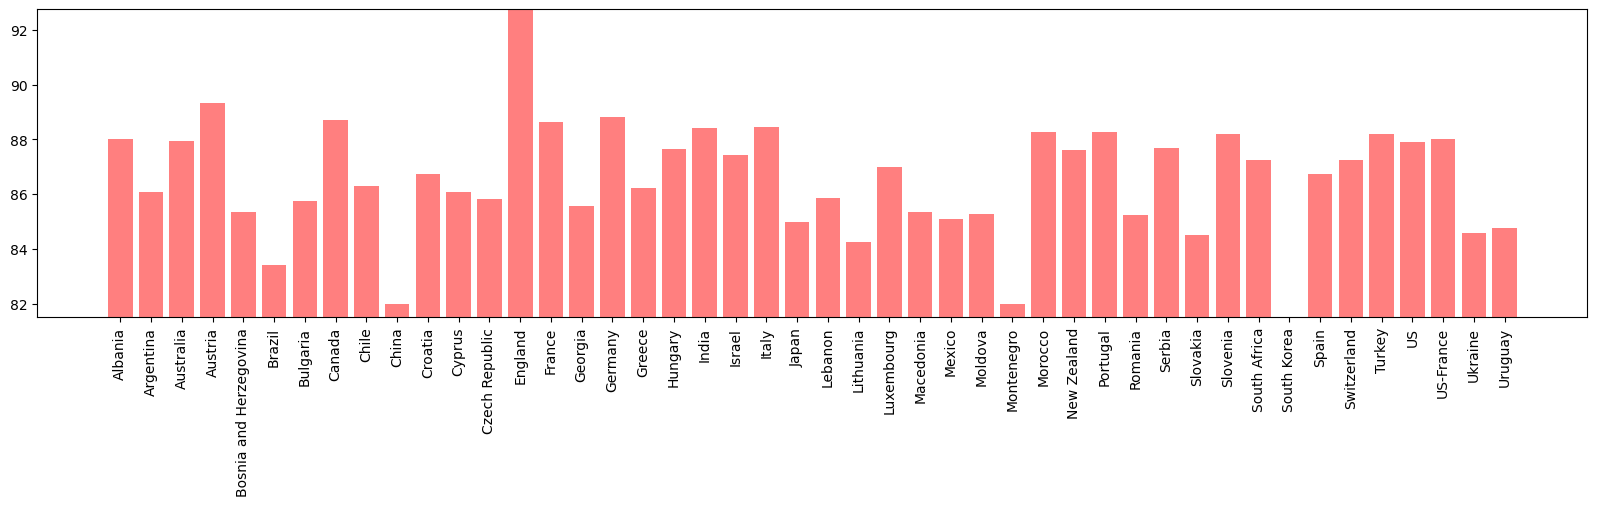

In [110]:
plt.figure(figsize=(20,4))
plt.bar(countrypoints.index, countrypoints, color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.ylim(min(countrypoints),max(countrypoints))
plt.show()